In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
df=pd.read_csv('C:\\Users\\Yujie\'s VMware\\Desktop\\training_data.csv')
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [26]:
# clean data and show
del df['error']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,SaleType,SaleCondition,binSalePrice
0,50,RM,L70,L10517,Pave,None,Reg,Lvl,AllPub,Inside,...,2,Fa,TA,Y,N,None,None,WD,Abnorml,N
1,20,RL,L70,L10517,Pave,None,IR1,Lvl,AllPub,Inside,...,1,TA,TA,Y,N,None,MnPrv,WD,Normal,N
2,20,RL,L70,L10517,Pave,None,Reg,Lvl,AllPub,Corner,...,2,TA,TA,Y,N,None,None,WD,Normal,N
3,20,RL,G70,L10517,Pave,None,Reg,Lvl,AllPub,Inside,...,2,TA,TA,Y,N,None,GdWo,WD,Abnorml,N
4,20,RL,G70,L10517,Pave,None,IR1,Lvl,AllPub,Inside,...,2,TA,TA,Y,N,None,None,WD,Normal,Y


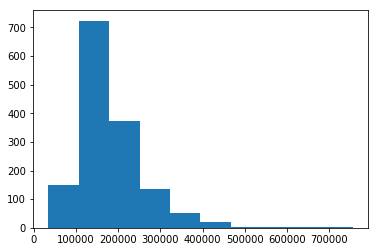

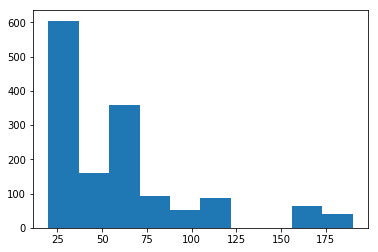

In [50]:
# show the distribution of a column
col = list(df['SalePrice']) 
plt.hist(col)

plt.show()

# show the distribution of another column
col = list(df['MSSubClass']) 
plt.hist(col)

plt.show()

### Splitting into train and test

In [6]:
X = df[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']]
y = df['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [7]:
print("X_train: ")
print(X_train.shape)
print("y_train: ")
print(y_train.shape)
print("X_test: ")
print(X_test.shape)
print("y_test: ")
print(y_test.shape)

X_train: 
(1168, 18)
y_train: 
(1168,)
X_test: 
(292, 18)
y_test: 
(292,)


### Using Linear Regression

In [53]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### show the coefficients of the linear regression model

In [54]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

1624810.78299
[ -1.32598253e+02   1.17264859e+00   3.27974313e+04   3.52017131e+02
   7.42385752e+01   3.87166477e+02   6.87797648e+01   3.05508150e+01
   4.81195345e+00   3.94460800e+01   8.24586253e+01   2.55083195e+01
   3.67581004e+01   6.78306474e+01   1.90173648e+02  -2.30935682e+00
  -7.58643734e+02  -1.29045399e+03]


In [57]:
# pair the feature names with the coefficients
list(zip(X, linreg.coef_))

[('MSSubClass', -132.59825288297418),
 ('LotArea', 1.1726485927894912),
 ('OverallQual', 32797.431340275551),
 ('OverallCond', 352.01713092259615),
 ('YearBuilt', 74.238575183515508),
 ('YearRemodAdd', 387.16647668821042),
 ('MasVnrArea', 68.779764836201025),
 ('BsmtFinSF1', 30.550814975040396),
 ('BsmtFinSF2', 4.811953445828749),
 ('WoodDeckSF', 39.446080031209931),
 ('OpenPorchSF', 82.458625258585016),
 ('EnclosedPorch', 25.508319545409904),
 ('3SsnPorch', 36.758100373945126),
 ('ScreenPorch', 67.830647415049953),
 ('PoolArea', 190.17364768682),
 ('MiscVal', -2.309356818373999),
 ('MoSold', -758.64373443570901),
 ('YrSold', -1290.4539903809468)]

### Make Prediction

In [58]:
y_pred = linreg.predict(X_test)
print(y_pred)

[  93201.65287675  142554.76960023  207127.40186274  129212.10104713
  284603.13460876   65916.12615103  200722.35383783  169593.14341713
  138022.19789723  138387.20437863  143561.19507458  150824.4043784
  141397.06769187  242451.92943507  294242.12637714  155754.66681213
  137312.71913462  129724.80248527  114876.63835247  150591.3640421
  123366.39990094  150807.12337525  243530.22799299   80763.41783606
  197680.6442071   103336.1791911   164351.0638006    90905.30200621
  168564.67988019  115830.7939216   155494.23908365  100141.70869163
  129753.99108892  156909.62744952  198024.33401226  127554.26516619
  202396.44876193  110389.71894826  176051.07333227  145661.99691863
  220408.37444225  116538.72044784  244706.34275193  195197.31242857
  278775.03276079  152402.88891841  144044.1694957    99239.71058997
  131931.4514502   110682.0707577   286158.2247229   135834.2312254
   97216.99608222  143430.65499509  119919.1222882   142851.58478543
  204412.40936722  153442.22728046  1

### Finally Check Error

### Here, we use Root Mean Squared Error (RMSE) which is the square root of the mean of the squared errors for error checking:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [59]:
from sklearn import metrics
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

46554.0967726


### Using logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)

[135000 139400 215000  85000 259500 108480 161750  93000 103600 129500
  80000 112000 115000 194000 171000 145000 130250 130500 151000 395192
 135000 266500 335000 135000 197000 110000 116000 135000 139000  98000
 181000  52500 110000 161000 248328 149000 215000 112500 143000 138000
 224900  86000 215000 162900 190000 165500  79000  87000 135000 112000
 223000  85400  90000 145000 143000 129500 204900 145000 127500 275000
 194000 114500 157900 260400 143500 254900 180000 190000 223000 150000
 215000  89500 145000 276000 111250 220000 172500 118964 130500 127000
 137000 146000 196000 123600 380000 266500 229000 129900 324000 181000
 260400 144152 202500 279500 319000 190000 130500 167000 171000 140000
 142000 250000  98000 275000  79900 215000 193000 199900 139600 143000
 137450 185900 328900 215000 259500 205950  87000 143900 167240 127000
 101800 224900 196500 167000 108959 180000 162000 129900 176000 319000
 124500 155900 266000 106000 215000 147000 121600 110000 165000 176000
  7990

### Classification accuracy:
### Proportion of correct predictions
### Common evaluation metric for classification problems


In [10]:
from sklearn import metrics
import numpy as np
print(metrics.accuracy_score(y_test, y_pred))

0.0
